# Plot Confusion Matrix

This notebook plots the confusion matrix for the Amazon Comprehend Custom Classifier.

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt   
from sklearn.metrics import confusion_matrix

In [2]:
def format_test_data(test_data):
    df = pd.read_csv(test_data, header=None)
    num = df.count()
    matrix2 = df[df.columns[0]].to_numpy()
    list2 = matrix2.tolist()
    return list2


def format_test_results(test_results):
    # Read in the predictions file
    file = open(test_results)
    predictions = file.read()
    file.close()

    p1 = re.compile('"')
    predictions1 = p1.sub('', predictions)

    p2 = re.compile('.*(Classes: )')
    predictions2 = p2.sub('', predictions1)

    p3 = re.compile('(,).*')
    predictions3 = p3.sub('', predictions2)

    p4 = re.compile('.*(Name: )')
    predictions4 = p4.sub('', predictions3)
    
    # delete the last line
    predictions5 = predictions4[:-1]

    # convert from string to list
    final_predictions = list(predictions5.split("\n"))

    return final_predictions


In [5]:
#modify this to point to a file containing the downloaded classification predictions
y_pred = format_test_results("LOCATION OF PREDICTED DATA") 

y_true = format_test_data("Testing_Data_with_labels.csv") 


In [6]:
y_true_count = len(y_true)
y_pred_count = len(y_pred)

print("# of y_true: " + str(y_true_count))
print("# of y_pred: " + str(y_pred_count))

# of y_true: 200
# of y_pred: 200


In [7]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[ 'General Medicine', 'Radiology', 'Surgery', 'Urology'])
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, vmin=0, vmax=50, fmt="d", cmap="Blues"); #annot=True to annotate cells
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['General Medicine', 'Radiology', 'Surgery', 'Urology']); 
    ax.yaxis.set_ticklabels(['General Medicine', 'Radiology', 'Surgery', 'Urology']);
    plt.setp(ax.get_xticklabels(), ha="right", rotation=90)
    plt.setp(ax.get_yticklabels(), ha="right", rotation=0)

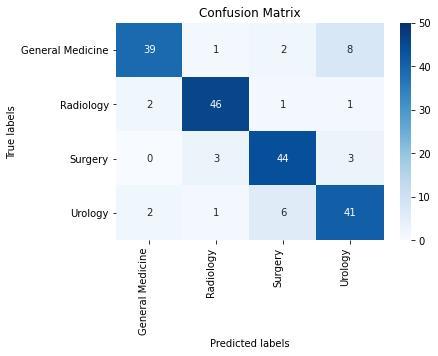

In [8]:
plot_confusion_matrix(y_true, y_pred)